### Importing Libraries

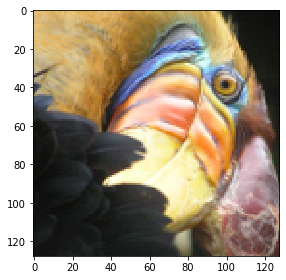

In [43]:
from skimage import io
import numpy as np
import numpy.matlib
import random

image = io.imread('/content/drive/MyDrive/input.png')
io.imshow(image)
io.show()

In [44]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],3)

In [45]:
def centroids(X,K):
    c = random.sample(list(X),K)
    return c
def new_centroids(X,c):
    K = np.size(c,0)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))
    for i in range(0,K):
        y = c[i]
        temp = np.ones((np.size(X,0),1))*y
        b = np.power(np.subtract(X,temp),2)
        a = np.sum(b,axis = 1)
        a = np.asarray(a)
        a.resize((np.size(X,0),1))
        #print(np.shape(a))
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1)
    return idx
def compute_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        ci = idx==i
        ci = ci.astype(int)
        total_number = sum(ci);
        ci.resize((np.size(X,0),1))
        total_matrix = np.matlib.repmat(ci,1,n)
        ci = np.transpose(ci)
        total = np.multiply(X,total_matrix)
        centroids[i] = (1/total_number)*np.sum(total,axis=0)
    return centroids
def Fit(X,initial_centroids,max_iters):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,K)
    return centroids,idx


Giving a input og K=10 and epochs of 50

In [46]:
K = 10 
max_iters = 50 

first_centroids = centroids(X,K)
centroids,idx = Fit(X,first_centroids,max_iters)

In [47]:
idc = new_centroids(X,centroids)
reduced_image = centroids[idc]
reduced_image = np.reshape(reduced_image, (rows, cols, 3))

In [48]:
import imageio 
imageio.imwrite('/content/drive/MyDrive/Changed_pic.jpg', reduced_image)